# Part I — Identifying Missing Values via Distributional Evidence (40 pts)



## 1. Initial Data Overview (5 pts)
Load the dataset and identify variables measured over time. Construct a proper datetime index from the available date and time columns.

Briefly describe:

- the temporal resolution of the data
- the number of numeric sensor
- variables available


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# uploading data
from google.colab import files
files.upload()

In [3]:
df = pd.read_csv("HW2 dataset.csv") #rename file accordingly
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),Unnamed: 5,Unnamed: 6
0,3/10/04,18:00:00,2.6,1360.0,150.0,NaN,NaN
1,3/10/04,19:00:00,2.0,1292.0,112.0,NaN,NaN
2,3/10/04,20:00:00,2.2,1402.0,88.0,NaN,NaN
3,3/10/04,21:00:00,2.2,1376.0,80.0,NaN,NaN
4,3/10/04,22:00:00,1.6,1272.0,51.0,NaN,NaN


In [4]:
# cleaning data
# df = df.drop(["Unnamed: 5", "Unnamed: 6"], axis = 1)
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
cols = ["DateTime", "CO(GT)", "PT08.S1(CO)", "NMHC(GT)"]
df = df[cols]
df

/tmp/ipython-input-514159979.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


,DateTime,CO(GT),PT08.S1(CO),NMHC(GT)
0,2004-03-10 18:00:00,2.6,1360.0,150.0
1,2004-03-10 19:00:00,2.0,1292.0,112.0
2,2004-03-10 20:00:00,2.2,1402.0,88.0
3,2004-03-10 21:00:00,2.2,1376.0,80.0
4,2004-03-10 22:00:00,1.6,1272.0,51.0
...,...,...,...,...
9466,NaT,NaN,NaN,NaN
9467,NaT,NaN,NaN,NaN
9468,NaT,NaN,NaN,NaN
9469,NaT,NaN,NaN,NaN


## 2. Distribution-Based Detection of Missing Values (20 pts)


Task:
Select three numeric sensor variables. For each variable:

- produce a histogram or density plot
- compute basic summary statistics (min, max, quartiles)


Hint:
In real sensor data, missing values are often encoded as extreme or repeated values that:

- fall far outside the physical range of the measurement
- appear at the same value across multiple variables
- create visible spikes or discontinuities in distributions

Concept:
Using the distributions and summaries:

- identify any common value(s) that are unlikely to represent valid measurements
- argue which value most plausibly represents missing data
- explain why this conclusion is supported across multiple variables, not just one

Do not assume missing-value encodings in advance. Your conclusion must be justified empirically.



### CO(GT) Data

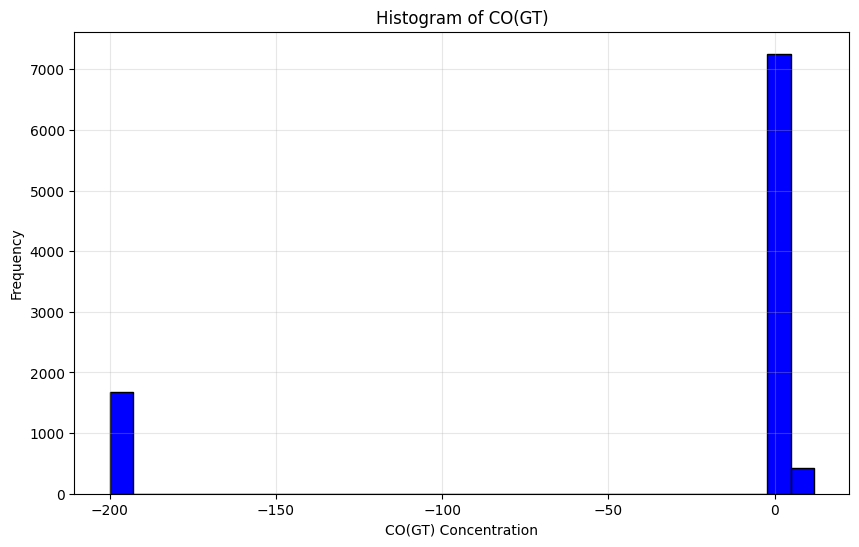

In [ ]:
# Simple histogram
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['CO(GT)'].dropna(), bins=30, color='blue', edgecolor='black')
plt.xlabel('CO(GT) Concentration')
plt.ylabel('Frequency')
plt.title('Histogram of CO(GT)')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# min, max, quartiles

df['CO(GT)'].describe()

,CO(GT)
count,9357.000000
mean,-34.207524
std,77.657170
min,-200.000000
25%,0.600000
50%,1.500000
75%,2.600000
max,11.900000


In [ ]:
# Counting unique values to identify abnormal values

#pd.set_option('display.max_rows', None)  # Show all rows
#pd.reset_option('display.max_rows')  # Reset to default
df['CO(GT)'].value_counts()

,count
CO(GT),
-200.0,1683
1.0,305
1.4,279
1.6,275
1.5,273
...,...
10.1,1
9.9,1
9.4,1


### PT08.S1(CO) Data

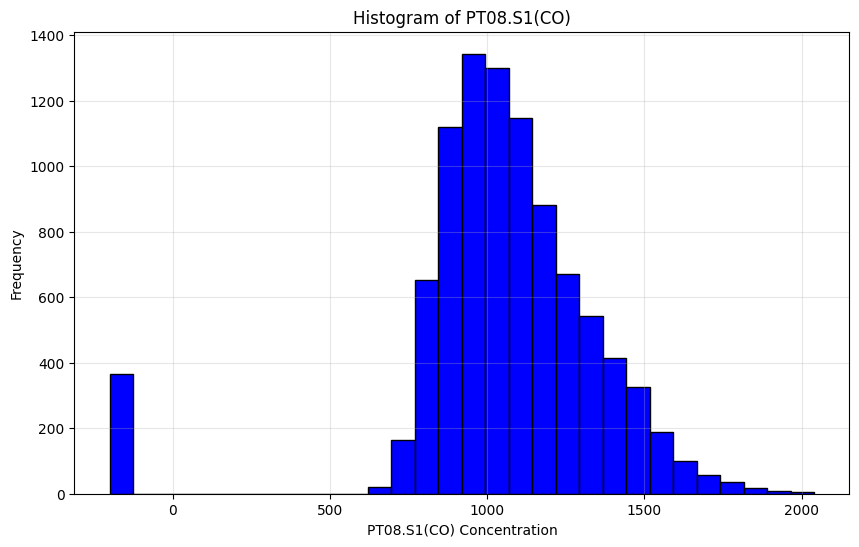

In [ ]:
# Simple histogram

plt.figure(figsize=(10, 6))
plt.hist(df['PT08.S1(CO)'].dropna(), bins=30, color='blue', edgecolor='black')
plt.xlabel('PT08.S1(CO) Concentration')
plt.ylabel('Frequency')
plt.title('Histogram of PT08.S1(CO)')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# min, max, quartiles

df['PT08.S1(CO)'].describe()

,PT08.S1(CO)
count,9357.000000
mean,1048.990061
std,329.832710
min,-200.000000
25%,921.000000
50%,1053.000000
75%,1221.000000
max,2040.000000


In [ ]:
# Count unique values
df['PT08.S1(CO)'].value_counts()

,count
PT08.S1(CO),
-200.0,366
973.0,30
1100.0,28
925.0,26
969.0,26
...,...
721.0,1
1680.0,1
1741.0,1


### NMHC(GT) Data

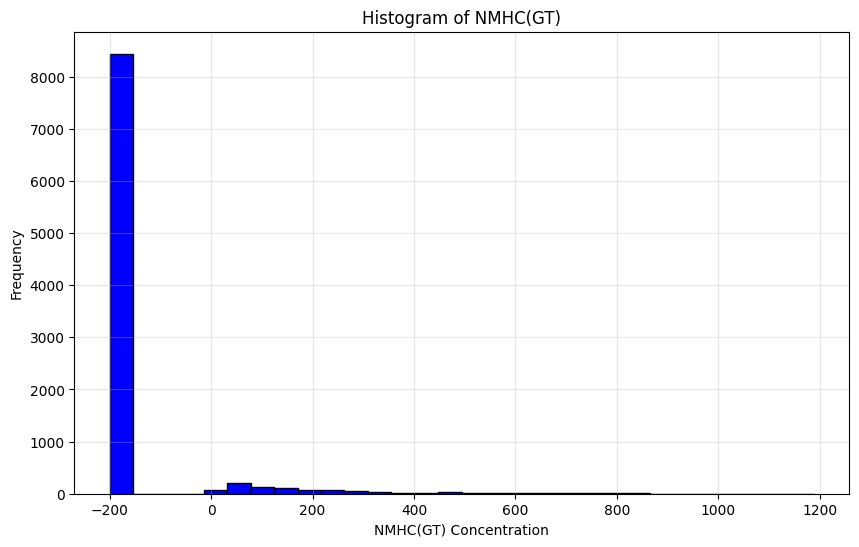

In [ ]:
# Simple histogram
plt.figure(figsize=(10, 6))
plt.hist(df['NMHC(GT)'].dropna(), bins=30, color='blue', edgecolor='black')
plt.xlabel('NMHC(GT) Concentration')
plt.ylabel('Frequency')
plt.title('Histogram of NMHC(GT)')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# min, max, quartiles

df['NMHC(GT)'].describe()

,NMHC(GT)
count,9357.000000
mean,-159.090093
std,139.789093
min,-200.000000
25%,-200.000000
50%,-200.000000
75%,-200.000000
max,1189.000000


In [ ]:
# Count unique values

df['NMHC(GT)'].value_counts()

,count
NMHC(GT),
-200.0,8443
66.0,14
40.0,9
29.0,9
88.0,8
...,...
265.0,1
365.0,1
642.0,1


In [ ]:
co_count = (df['CO(GT)'] == -200).sum()
nmhc_count = (df['NMHC(GT)'] == -200).sum()
pt_count = (df['PT08.S1(CO)'] == -200).sum()

print("CO(GT) -200 count:", co_count)
print("PT08.S1(CO) -200 count:", pt_count)
print("NMHC(GT) -200 count:", nmhc_count)

CO(GT) -200 count: 1683
PT08.S1(CO) -200 count: 366
NMHC(GT) -200 count: 8443


Looking at the counts of different values as well as the histogram of the data for each time series, we can assume that a reading of -200 is an abnormal reading and likely indicates a sensor failure/missing data. -200 falls far outside the range of seemingly normal values for each time series (indicated by an obvious spike on the left of each histogram,) and this unique value appears in the data much more often than other values.

- CO(GT) Data: The value -200 appears 1683 times

- PT08.S1(CO) Data: The value -200 appears 366 times

- NMHC(GT) Data: The value -200 appears 8443 times

## 3. Quantifying and Classifying Missingness (10 pts)

After identifying the missing-value encoding:

- compute the number of missing observations per selected variable
- compute the percentage of missing observations

Concept:
Based on when missing values occur (isolated points vs clusters, early vs late periods), discuss whether the missingness is more consistent with:

- MCAR
- MAR
- MNAR

Support your answer using plausible sensor or data-collection mechanisms.



In [ ]:
int(df['DateTime'].isna().sum()) # number of NA dates

114

In [ ]:
# number and percentage of na vals per sensor
sensors = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)']

empty_values = {}
for sensor in sensors:
  count = (df[sensor].isna()).sum() # count per sensor
  perc = count/len(df)*100 # percentage
  empty_values[sensor] = [count, perc]

emptyVals = pd.DataFrame(empty_values).T
emptyVals.rename(columns={0: 'Count', 1: 'Percentage'}, inplace=True)
emptyVals

,Count,Percentage
CO(GT),114.0,1.203674
PT08.S1(CO),114.0,1.203674
NMHC(GT),114.0,1.203674


In [ ]:
# count rows where the whole row is NA -> all of them and since that includes the datetime var, these are completely empty records and are safe to drop
print("Number of rows where the whole row is NA:", df.isna().all(axis=1).sum())

Number of rows where the whole row is NA: 114


In [ ]:
# based on above code, observation of -200 is our missing/invalid measurement

sensors = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)']

missing_values = {}
for sensor in sensors:
  count = (df[sensor] == -200).sum() # count per sensor
  perc = count/len(df)*100 # percentage
  missing_values[sensor] = [count, perc]

missingVals = pd.DataFrame(missing_values).T
missingVals.rename(columns={0: 'Count', 1: 'Percentage'}, inplace=True)
missingVals


,Count,Percentage
CO(GT),1683.0,17.770035
PT08.S1(CO),366.0,3.864428
NMHC(GT),8443.0,89.145814


In [ ]:
# confirmation of what found above
df['is_weird_CO'] = df['CO(GT)'] == -200
df['is_weird_PT08.S1(CO)'] = df['PT08.S1(CO)'] == -200
df['is_weird_NMHC(GT)'] = df['NMHC(GT)'] == -200
df[['is_weird_CO', 'is_weird_PT08.S1(CO)', 'is_weird_NMHC(GT)']].corr()

,is_weird_CO,is_weird_PT08.S1(CO),is_weird_NMHC(GT)
is_weird_CO,1.000000,-0.041613,0.140899
is_weird_PT08.S1(CO),-0.041613,1.000000,0.022412
is_weird_NMHC(GT),0.140899,0.022412,1.000000


The -200 values of the 3 sensors are mostly independent (only 114 of the values happen at the same time across all 3 and correlation values are very low/close to zero). This suggests the readings are not due to s single system wide outage but sensor-specific errors.

## 4. Consecutive Missing Values (5 pts)
Task:
Examine whether missing values:

- occur individually, or
- appear in consecutive sequences (runs)

Concept:

Discuss:

- why consecutive missing values are more problematic than isolated ones
- which imputation methods break down under long runs of missingness
- whether such patterns exist in this dataset



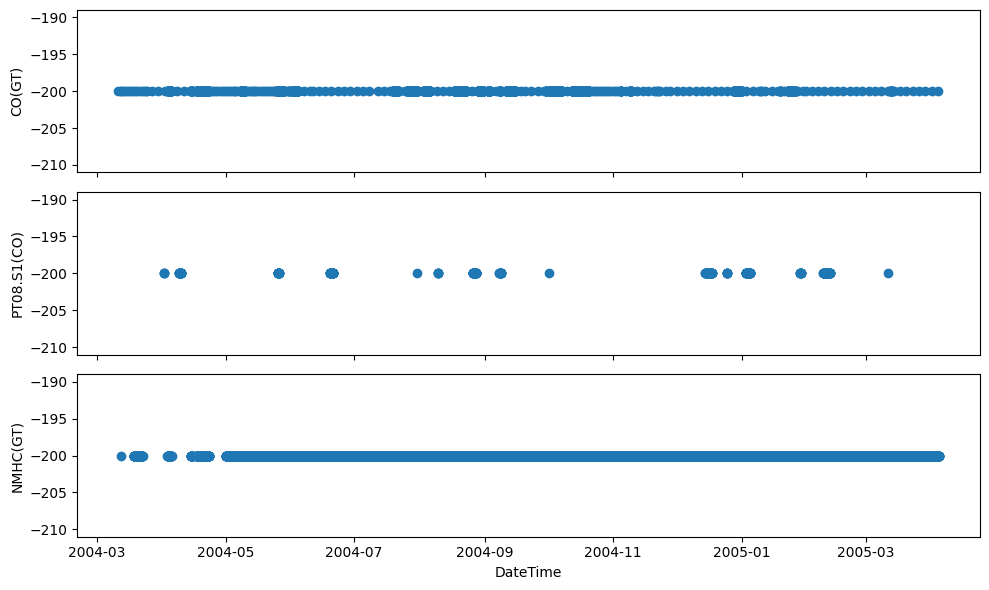

In [ ]:
# plot the -200 data over time

fig, ax = plt.subplots(len(sensors), figsize=(10, 6), sharex=True)

for i, sensor in enumerate(sensors):
  vals = df[df[sensor]==-200]
  ax[i].scatter(vals['DateTime'], vals[sensor])
  ax[i].set_ylabel(sensor)

ax[-1].set_xlabel('DateTime')
plt.tight_layout()
plt.show()

In [ ]:
# when are all 3 sensors down? # datetime is hourly readings so any difference larger than an hour is an outage

mask = (
    (df['CO(GT)'] == -200) &
    (df['PT08.S1(CO)'] == -200) &
    (df['NMHC(GT)'] == -200)
)

allSensorOutage = df.loc[mask, 'DateTime'].sort_values() # series not df
allSensorOutageDf = pd.DataFrame(allSensorOutage)
allSensorOutageDf['timeDiff'] = allSensorOutageDf['DateTime'].diff()
allSensorOutageDf['NewOutage'] = allSensorOutageDf['timeDiff'] > pd.Timedelta(hours=1)
allSensorOutageDf = allSensorOutageDf.copy()
allSensorOutageDf.at[allSensorOutageDf.index[0], 'NewOutage'] = True

In [ ]:
numOutages = int(allSensorOutageDf['NewOutage'].sum())

print(f"{numOutages} total outages in the time period: {df['DateTime'].min()} to {df['DateTime'].max()}")

# Get the indices of outage starts
outage_starts = allSensorOutageDf.index[allSensorOutageDf['NewOutage']].tolist()

i = 0
outageTable = []
for idx in outage_starts:

  if i < len(outage_starts) -1:
    # get end time
    endIdx = outage_starts[i+1] # next start index -1
  else: # last outage
    endIdx = allSensorOutageDf.index[-1]

  # outage block
  outage = len(allSensorOutageDf.loc[idx:endIdx]) -1 # end index is when the new outage starts

  outageTable.append([allSensorOutageDf.loc[idx, 'DateTime'], allSensorOutageDf.loc[endIdx, 'DateTime'], outage])

  i+=1

allDf = pd.DataFrame(outageTable, columns = ['Start Time', 'End Time', 'Outage Duration'])

print(f"\nTotal Number of outages with a duration of more than 3 hours: {len(allDf[allDf['Outage Duration'] > 3])}")
print("\nConsecutive missing vals for all 3 sensors:")
allDf[allDf['Outage Duration'] > 3]

8 total outages in the time period: 2004-03-10 18:00:00 to 2005-04-04 14:00:00

Total Number of outages with a duration of more than 3 hours: 3

Consecutive missing vals for all 3 sensors:


,Start Time,End Time,Outage Duration
0,2004-05-25 19:00:00,2004-06-20 04:00:00,14
3,2004-09-07 23:00:00,2004-09-08 10:00:00,10
4,2004-09-08 10:00:00,2004-12-16 04:00:00,7


In [ ]:
def sensorOutage(allSensorOutage):
  allSensorOutageDf = pd.DataFrame(allSensorOutage)
  allSensorOutageDf['timeDiff'] = allSensorOutageDf['DateTime'].diff()
  allSensorOutageDf['NewOutage'] = allSensorOutageDf['timeDiff'] > pd.Timedelta(hours=1)
  allSensorOutageDf = allSensorOutageDf.copy()
  allSensorOutageDf.at[allSensorOutageDf.index[0], 'NewOutage'] = True

  numOutages = int(allSensorOutageDf['NewOutage'].sum())

  print(f"{numOutages} total outages in the time period: {df['DateTime'].min()} to {df['DateTime'].max()}")

  # Get the indices of outage starts
  outage_starts = allSensorOutageDf.index[allSensorOutageDf['NewOutage']].tolist()

  i = 0
  outageTable = []
  for idx in outage_starts:

    if i < len(outage_starts) -1:
      # get end time
      endIdx = outage_starts[i+1] # next start index -1
    else: # last outage
      endIdx = allSensorOutageDf.index[-1]

    # outage block
    outage = len(allSensorOutageDf.loc[idx:endIdx]) -1 # end index is when the new outage starts

    i+=1
    outageTable.append([allSensorOutageDf.loc[idx, 'DateTime'], allSensorOutageDf.loc[endIdx, 'DateTime'], outage])

  return outageTable

In [ ]:
# outages for sensor CO(GT)

mask = df['CO(GT)'] == -200

sensorOutageVals = df.loc[mask, 'DateTime'].sort_values()
outageTable = sensorOutage(sensorOutageVals)
dfCO = pd.DataFrame(outageTable, columns = ['Start Time', 'End Time', 'Outage Duration'])

print(f"\nTotal of {len(dfCO[dfCO['Outage Duration'] > 3])} outages spanning more than 3 hours")
print("\nConsecutive missing vals for sensor CO(GT):")
dfCO[dfCO['Outage Duration'] > 3]


187 total outages in the time period: 2004-03-10 18:00:00 to 2005-04-04 14:00:00

Total of 32 outages spanning more than 3 hours

Consecutive missing vals for sensor CO(GT):


,Start Time,End Time,Outage Duration
19,2004-04-03 10:00:00,2004-04-08 04:00:00,48
23,2004-04-14 13:00:00,2004-04-17 03:00:00,20
24,2004-04-17 03:00:00,2004-04-24 04:00:00,146
40,2004-05-08 03:00:00,2004-05-11 04:00:00,54
57,2004-05-25 15:00:00,2004-05-26 17:00:00,18
58,2004-05-26 17:00:00,2004-05-29 04:00:00,46
61,2004-05-31 02:00:00,2004-06-01 01:00:00,4
62,2004-06-01 01:00:00,2004-06-02 01:00:00,4
63,2004-06-02 01:00:00,2004-06-07 04:00:00,63
80,2004-07-19 12:00:00,2004-07-22 08:00:00,54


In [ ]:
# outages for sensor PT08.S1(CO)

mask = df['PT08.S1(CO)'] == -200

sensorOutageVals = df.loc[mask, 'DateTime'].sort_values()
outageTable = sensorOutage(sensorOutageVals)
dfPT = pd.DataFrame(outageTable, columns = ['Start Time', 'End Time', 'Outage Duration'])

print(f"\nTotal of {len(dfPT[dfPT['Outage Duration'] > 3])} outages spanning more than 3 hours")
print("\nConsecutive missing vals for sensor PT08.S1(CO):")
dfPT[dfPT['Outage Duration'] > 3]

16 total outages in the time period: 2004-03-10 18:00:00 to 2005-04-04 14:00:00

Total of 12 outages spanning more than 3 hours

Consecutive missing vals for sensor PT08.S1(CO):


,Start Time,End Time,Outage Duration
1,2004-04-08 23:00:00,2004-05-25 19:00:00,24
2,2004-05-25 19:00:00,2004-06-19 14:00:00,14
3,2004-06-19 14:00:00,2004-07-31 00:00:00,38
5,2004-08-09 16:00:00,2004-08-26 06:00:00,4
6,2004-08-26 06:00:00,2004-09-07 23:00:00,45
7,2004-09-07 23:00:00,2004-09-08 10:00:00,10
8,2004-09-08 10:00:00,2004-10-01 14:00:00,8
10,2004-12-14 17:00:00,2004-12-24 19:00:00,75
11,2004-12-24 19:00:00,2005-01-02 21:00:00,5
12,2005-01-02 21:00:00,2005-01-28 17:00:00,52


In [ ]:
# outages for sensor NMHC(GT)

mask = df['NMHC(GT)'] == -200

sensorOutageVals = df.loc[mask, 'DateTime'].sort_values()
outageTable = sensorOutage(sensorOutageVals)
dfNM = pd.DataFrame(outageTable, columns = ['Start Time', 'End Time', 'Outage Duration'])

print(f"\nTotal of {len(dfNM[dfNM['Outage Duration'] > 3])} outages spanning more than 3 hours")
print("\nConsecutive missing vals for sensor NMHC(GT):")
dfNM[dfNM['Outage Duration'] > 3]

6 total outages in the time period: 2004-03-10 18:00:00 to 2005-04-04 14:00:00

Total of 5 outages spanning more than 3 hours

Consecutive missing vals for sensor NMHC(GT):


,Start Time,End Time,Outage Duration
1,2004-03-18 10:00:00,2004-04-03 10:00:00,102
2,2004-04-03 10:00:00,2004-04-14 13:00:00,48
3,2004-04-14 13:00:00,2004-04-17 03:00:00,20
4,2004-04-17 03:00:00,2004-05-01 01:00:00,146
5,2004-05-01 01:00:00,2005-04-04 14:00:00,8125


Analysis of the outages for the sesors finds these consecutive values - time blocks can be considered as consecutive missing values (more than 3 data points missing in a row)
* For sensor NMHC(GT), 5 of the outages are longer than 3 hours
* For sensor PT08.S1(CO), 12 of the outage are longer than 3 hours
* For sensor CO(GT), 32 of the outages are longer than 3 hours
* There are 3 outages longer than 3 hours that happen across all 3 sensors

Isolated missing values are a lot easier to handle since the surrounding observed data provide context for what the missing value should be and methods such as linear interpolation, forward/back fill or rolling average work in these cases.

When consecutive missing terms occur, there is no nearby data to give context for what the missing value should be. Consecutive missing values break temporal dependencies (reducing model performace), errors propagate across the gap (leading to larger deviations from true values) and seasonality or other cycles can be distorted if blocks of data are missing.

Imputation methods that fail under long runs of missingness are linear interpolation, forward-fill/backward-fill, mean/median imputation, seasonality/moving average imputation.

Consecutive missing data does exist in this dataset both when all 3 sensors are reporting invalid values and for individual senors.

# Part II — Imputation Methods and Failure Modes (30 pts)



## 5. Deterministic Imputation Methods (20 pts)

For one selected variable, apply:

- forward fill
 -backward fill
- moving average fill
- interpolation

For each method, explain:

- the implicit assumption it makes about the data
- how it behaves when missing values occur consecutively
- one scenario where the method would be inappropriate for sensor data


### **Deterministic Imputation Methods**
For this analysis, the variable CO(GT) was selected. The following four deterministic imputation methods were applied:

**Forward Fill (ffill)**

1. Implicit Assumption: Assumes the state of the system remains constant from the last observed time point until a new observation is made. It assumes persistence in the data.

2. Behavior with Consecutive Missing Values: It produces a flat horizontal line extending from the last known value across the entire gap. The imputed values have zero variance.

3. Inappropriate Scenario: This is inappropriate for highly volatile data or data with strong intraday seasonality (e.g., temperature changing rapidly during sunrise) where assuming a constant value for hours would ignore obvious physical trends.


**Backward Fill (bfill)**

1. Implicit Assumption: Assumes that the future state determines the missing past state. It implies that the value observed after the gap was the state of the system during the gap.

2. Behavior with Consecutive Missing Values: Similar to forward fill, it produces a flat horizontal line, but the value is derived from the end of the gap, propagating backwards.

3. Inappropriate Scenario: This is fundamentally inappropriate for real-time streaming systems or forecasting models where future data is not yet available. It introduces look-ahead bias (data leakage) which invalidates any predictive model trained on such data.

**Moving Average Fill**

1. Implicit Assumption: Assumes the missing value can be approximated by the local mean of recent observations (stationarity within the window). It assumes the underlying signal is smooth and deviations are noise.

2. Behavior with Consecutive Missing Values: If the gap is smaller than the rolling window, it fills values with a smoothed curve that lags behind the trend. If the gap is larger than the window, this method fails completely (returns NaN) or degenerates into a flat line (if filling with a static mean), depending on implementation. It tends to dampen the variance significantly.

3. Inappropriate Scenario: Inappropriate for data with sharp, genuine spikes (e.g., a sudden gas leak detection) because the moving average will smooth out the peak, treating the critical signal as noise or averaging it down.

**Interpolation (Linear)**

1. Implicit Assumption: Assumes the change between two data points is linear and constant over time. It assumes the shortest path between two points is the best approximation.

2. Behavior with Consecutive Missing Values: It draws a straight diagonal line connecting the last valid observation before the gap to the first valid observation after the gap.

3. Inappropriate Scenario: Inappropriate for non-linear or cyclical data, such as traffic volume or air quality over a weekend gap. A straight line would miss the daily "peaks and valleys" (circadian rhythm) that actually occurred during the missing period.

In [ ]:
target_col = 'CO(GT)'
sample_df = df.copy()
sample_df = sample_df.set_index('DateTime')
sample_df = sample_df.replace(-200, np.nan)
sample_df

,CO(GT),PT08.S1(CO),NMHC(GT),is_weird_CO,is_weird_PT08.S1(CO),is_weird_NMHC(GT)
DateTime,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,False,False,False
2004-03-10 19:00:00,2.0,1292.0,112.0,False,False,False
2004-03-10 20:00:00,2.2,1402.0,88.0,False,False,False
2004-03-10 21:00:00,2.2,1376.0,80.0,False,False,False
2004-03-10 22:00:00,1.6,1272.0,51.0,False,False,False
...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,False,False,False
NaT,NaN,NaN,NaN,False,False,False
NaT,NaN,NaN,NaN,False,False,False


In [ ]:
# Method A: Forward Fill
sample_df['ffill'] = sample_df[target_col].fillna(method='ffill')

# Method B: Backward Fill
sample_df['bfill'] = sample_df[target_col].fillna(method='bfill')

# Method C: Moving Average Fill
window_size = 250
sample_df['rolling_mean'] = sample_df[target_col].fillna(
    sample_df[target_col].rolling(window=window_size, min_periods=1).mean()
)

# Method D: Interpolation (Linear)
sample_df['interp'] = sample_df[target_col].interpolate(method='linear')

/tmp/ipython-input-3308210640.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sample_df['ffill'] = sample_df[target_col].fillna(method='ffill')
/tmp/ipython-input-3308210640.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sample_df['bfill'] = sample_df[target_col].fillna(method='bfill')


In [ ]:
sample_df

,CO(GT),PT08.S1(CO),NMHC(GT),is_weird_CO,is_weird_PT08.S1(CO),is_weird_NMHC(GT),ffill,bfill,rolling_mean,interp
DateTime,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,False,False,False,2.6,2.6,2.600000,2.6
2004-03-10 19:00:00,2.0,1292.0,112.0,False,False,False,2.0,2.0,2.000000,2.0
2004-03-10 20:00:00,2.2,1402.0,88.0,False,False,False,2.2,2.2,2.200000,2.2
2004-03-10 21:00:00,2.2,1376.0,80.0,False,False,False,2.2,2.2,2.200000,2.2
2004-03-10 22:00:00,1.6,1272.0,51.0,False,False,False,1.6,1.6,1.600000,1.6
...,...,...,...,...,...,...,...,...,...,...
NaT,NaN,NaN,NaN,False,False,False,2.2,NaN,1.394203,2.2
NaT,NaN,NaN,NaN,False,False,False,2.2,NaN,1.385401,2.2
NaT,NaN,NaN,NaN,False,False,False,2.2,NaN,1.372059,2.2


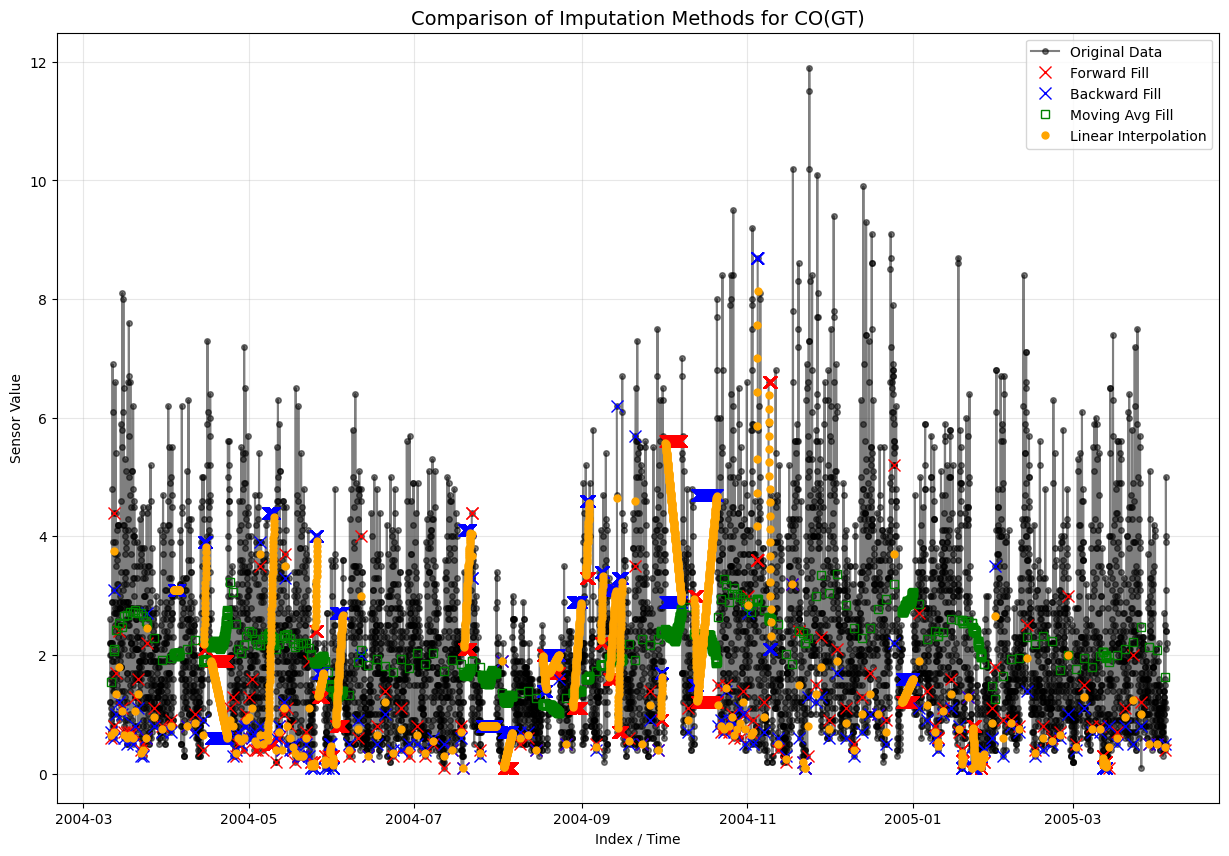

In [ ]:
plt.figure(figsize=(15, 10))

plt.plot(sample_df.index, sample_df[target_col], 'o-', color='black', label='Original Data', markersize=4, alpha=0.5)

missing_mask = sample_df[target_col].isna()

plt.plot(sample_df.index[missing_mask], sample_df.loc[missing_mask, 'ffill'],
         'x', color='red', label='Forward Fill', markersize=8)

plt.plot(sample_df.index[missing_mask], sample_df.loc[missing_mask, 'bfill'],
         'x', color='blue', label='Backward Fill', markersize=8)

plt.plot(sample_df.index[missing_mask], sample_df.loc[missing_mask, 'rolling_mean'],
         's', color='green', label='Moving Avg Fill', markersize=6, fillstyle='none')

plt.plot(sample_df.index[missing_mask], sample_df.loc[missing_mask, 'interp'],
         '.', color='orange', label='Linear Interpolation', markersize=10)

plt.title(f'Comparison of Imputation Methods for {target_col}', fontsize=14)
plt.xlabel('Index / Time')
plt.ylabel('Sensor Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 6. Comparative Evaluation of Imputation Strategies (10 pts)

Compare the four methods with respect to:

- information preservation
- induced smoothness
- sensitivity to long missing runs

Argue which method is least defensible when missing values cluster and explain why.






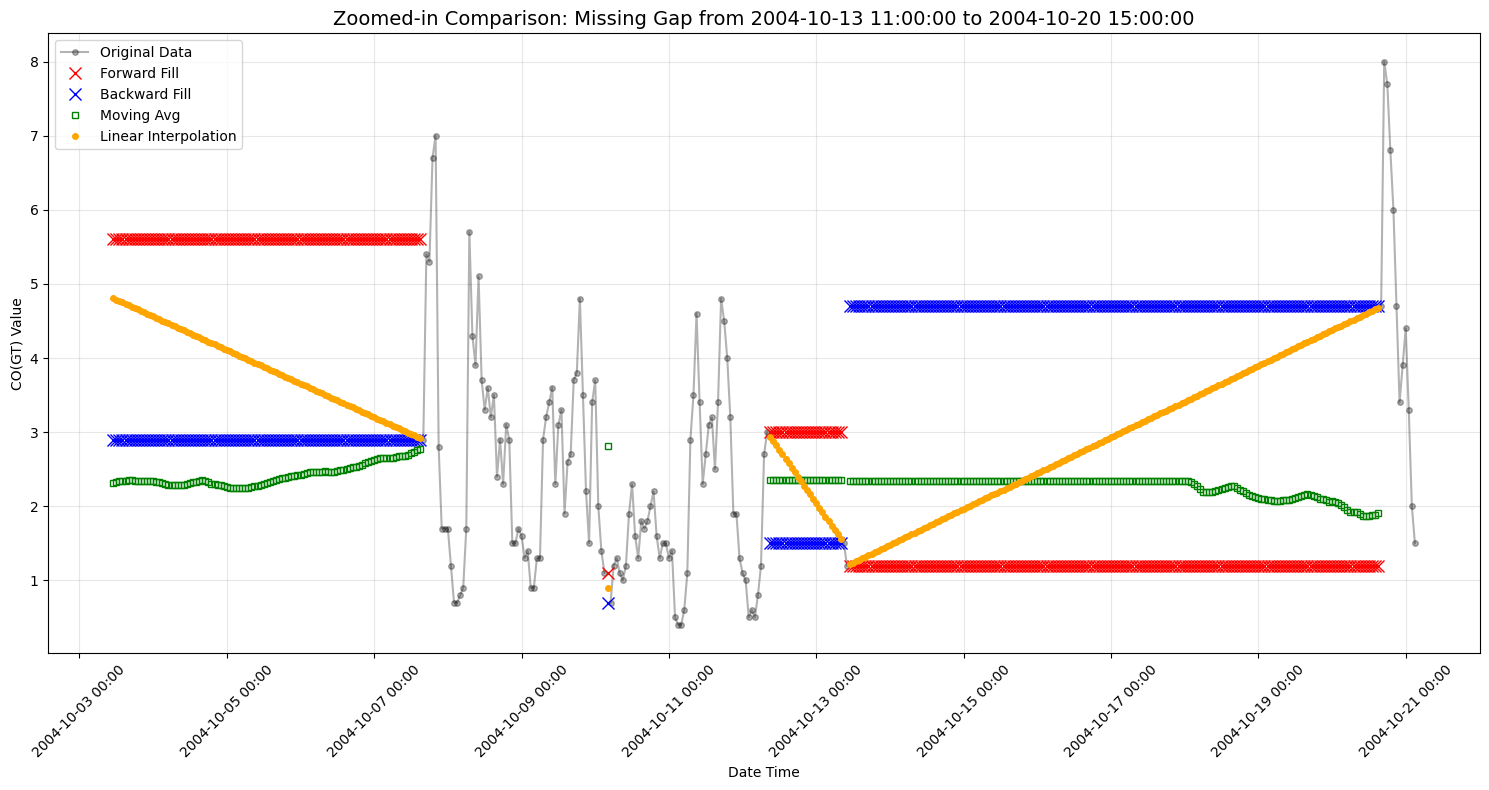

In [ ]:
import matplotlib.dates as mdates

is_na = sample_df[target_col].isna()
group_ids = (is_na != is_na.shift()).cumsum()
gap_sizes = sample_df.groupby(group_ids).size()
na_groups = group_ids[is_na]

if not na_groups.empty:
    largest_gap_id = gap_sizes[na_groups.unique()].idxmax()
    gap_data = sample_df[group_ids == largest_gap_id]

    # Extend plot_start to 240 hours (10 days) before the gap for more historical context
    plot_start = gap_data.index[0] - pd.Timedelta(hours=240)
    plot_end = gap_data.index[-1] + pd.Timedelta(hours=12)

    subset = sample_df.loc[plot_start:plot_end]
    start_time = gap_data.index[0]
    end_time = gap_data.index[-1]
else:
    subset = sample_df.iloc[0:100]
    start_time = subset.index[0]
    print("Warning: No missing values found.")

fig, ax = plt.subplots(figsize=(15, 8))


ax.plot(subset.index, subset[target_col], 'o-', color='black',
        label='Original Data', markersize=4, alpha=0.3, linewidth=1.5)

mask_subset = subset[target_col].isna()
x_missing = subset.index[mask_subset]

ax.plot(x_missing, subset.loc[mask_subset, 'ffill'], 'x', color='red', label='Forward Fill', markersize=8)
ax.plot(x_missing, subset.loc[mask_subset, 'bfill'], 'x', color='blue', label='Backward Fill', markersize=8)
ax.plot(x_missing, subset.loc[mask_subset, 'rolling_mean'], 's', color='green', label='Moving Avg', markersize=5, fillstyle='none')
ax.plot(x_missing, subset.loc[mask_subset, 'interp'], '.', color='orange', label='Linear Interpolation', markersize=8)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=45)

plt.title(f'Zoomed-in Comparison: Missing Gap from {start_time} to {end_time}', fontsize=14)
plt.xlabel('Date Time')
plt.ylabel('CO(GT) Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Comparison of Methods

**Information preservation:**

1. Forward/Backward Fill preserve the exact magnitude of the last observed data point but completely erase temporal dynamics and variance within the gap.

2. Moving Average preserves the local mean (central tendency) but suppresses volatility, effectively filtering out high-frequency information.

3. Linear Interpolation preserves the directional trend between the start and end of the gap but fabricates the path, ignoring natural fluctuations or seasonality.

**Induced smoothness:**

1. Moving Average induces the highest level of organic smoothness, acting like a low-pass filter.

2. Linear Interpolation induces artificial smoothness by creating perfectly straight lines with constant gradients.

3. Forward/Backward Fill induce no smoothness; instead, they create "step functions" with unnatural, sharp discontinuities at the gap boundaries.

**Sensitivity to long missing runs:**

1. Forward/Backward Fill are critically sensitive; as seen in the plot (red line), they create massive, unrealistic plateaus that distort the statistical distribution of the data.

2. Linear Interpolation is sensitive to the gap width; for long runs, it draws a "bridge" that misses any events or cycles occurring in between (e.g., daily peaks).

3. Moving Average is structurally sensitive; if the gap exceeds the window size, the method often converges to a flat line or fails to output a value.

**Least Defensible Method for Clustered Missing Values**

1. Forward Fill (and Backward Fill) is the least defensible method when missing values cluster.

2. Physical Impossibility: Environmental variables like CO concentration represent continuous physical processes. It is physically impossible for air quality to freeze at an exact value for days (the long horizontal red line in the plot) and then teleport instantly to a new value.

3. Model Destabilization: The resulting "plateau" has zero variance, while the edge of the gap creates an infinite gradient (shock). This artifact introduces severe bias into summary statistics and breaks downstream models that rely on derivatives or volatility.

# Part III — Time Index Integrity and Corruption (15 pts)



## 7. Missing or Corrupted Time Information (15 pts)

Conceptual (no coding required):

Suppose the time variable itself is:

- partially missing
- duplicated
- misordered
- or contains impossible timestamps

Discuss:

- Why this is more serious than missing sensor values
- How such problems can be detected
- At least two possible remediation strategies
- Conditions under which analysis should not proceed

Frame your answer in the context of environmental sensor data.

**1.**

 It is more serious because the four features completely destory the Causality and Autocorrelation. If time is misordered, duplicated, contains impossible timestamp, we can not call it as time-series, since the most important index is messed up. If time pertially missing, the model will mistakenly treat the two points as adjacent points, which leads to error in differencing.

**2.**

 To detect misordered, we can use "is_monotonic_increasing"

To detect duplicated, we can use ".duplicated()" method

To detect missing, we can use "df.index.diff()" and observe the intervals

To detect impossible timestamp, we can check the scale(plot time-index).

**3.**

 Use "Aggregation" to solve duplicates, we can group by time and use mean()

Use "Sort" to solve misordered. We can try df.sort_index()

Use "Resampling" to solve missing. We can set up a time axis and reindex the data and fill the blanks with interpolation.

Use "Filter" to solve impossible value.

**4.**

case 1: the missing value is too much and we can't recover the real sampling frequency.

case 2: when we don't know the real time sequence and the time sequence is completely messed up.

# Part IV — Smoothing Models Under Imperfect Data (15 pts)

## 8. Model Readiness and Smoothing (15 pts)

Select one imputation method and one variable.

- Use a 90% / 10% temporal train–test split
- Fit:

  *   Simple Exponential Smoothing
  *   Holt's additive trend
  *   Holt-Winter's additive trend

For each model:

- overlay predictions and test data
- compute sMAPE

Concept:

Discuss how the imputation choice influenced:

- forecast smoothness
- responsiveness to changes
- perceived model performance

Explain why better accuracy does not necessarily imply a better model.



In [5]:
!pip install sktime

from sktime.forecasting.all import temporal_train_test_split
from sktime.forecasting.all import ExponentialSmoothing
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.8/159.8 kB 11.8 MB/s eta 0:00:00


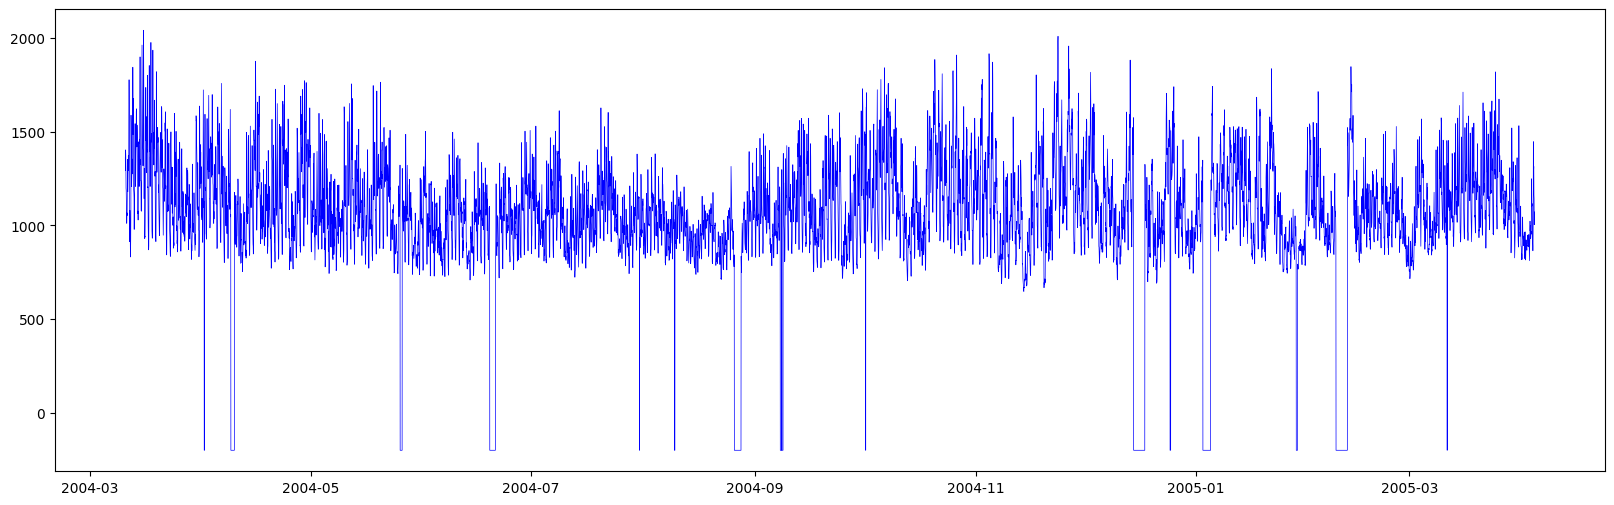

In [6]:
plt.figure(figsize=(20,6))
plt.plot(df['DateTime'], df['PT08.S1(CO)'], color='blue', linewidth=0.5)

plt.show()

In [7]:
# Imputation method: forward fill
# Selected Variable: PT08.S1(CO)

from statsmodels.tsa.holtwinters import Holt, SimpleExpSmoothing, ExponentialSmoothing

col = 'PT08.S1(CO)'

df[col] = df[col].replace(-200, np.nan)

df[col] = df[col].fillna(method='ffill')

/tmp/ipython-input-3426338319.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')


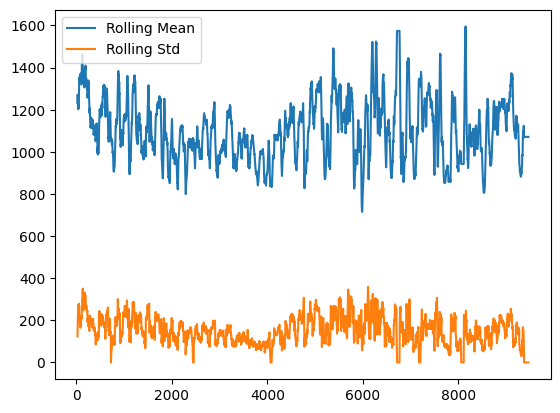

In [8]:
df[col].rolling(window=24).mean().plot(label='Rolling Mean')
df[col].rolling(window=24).std().plot(label='Rolling Std')
plt.legend()
plt.show()

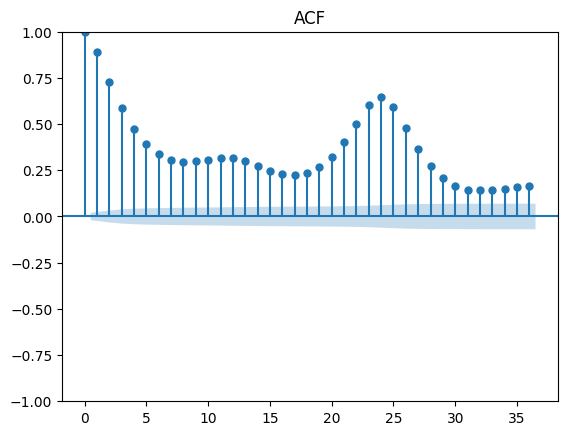

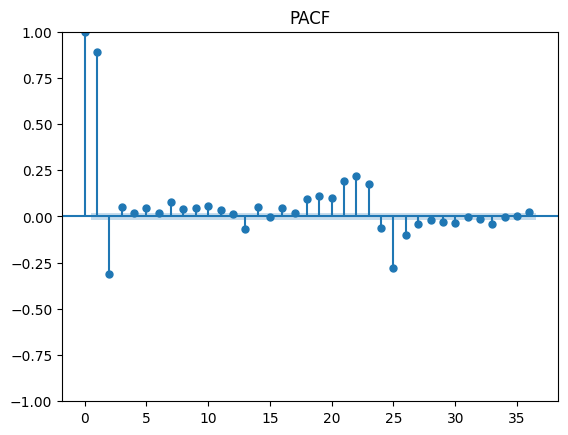

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df[col], lags=36)
plt.title("ACF")
plt.show()

plot_pacf(df[col], lags=36)
plt.title("PACF")
plt.show()

- The ACF/PACF suggests a strongly autocorrelated series with pronounced 24-period seasonality.

In [10]:
# train test split

y_train, y_test = temporal_train_test_split(df[col], test_size=0.1)

print("Length of train set is " + str(y_train.shape[0]))
print("Length of test set is " + str(y_test.shape[0]))

Length of train set is 8523
Length of test set is 948


sMAPE: 0.23912278998549033


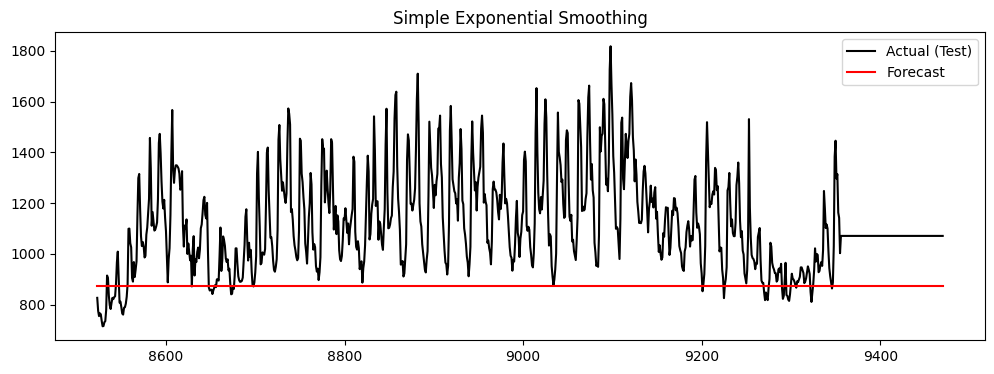

In [11]:
# Simple Exponential Smoothing

ses_model = SimpleExpSmoothing(y_train).fit(smoothing_level=0.2,optimized=False)

y_pred_ses = pd.Series(ses_model.forecast(len(y_test)), index=y_test.index)

# sMAPE
denominator = np.abs(y_test) + np.abs(y_pred_ses)
mask = denominator != 0

smape_result = np.mean(
    2 * np.abs(y_pred_ses[mask] - y_test[mask]) / denominator[mask]
)

print(f"sMAPE: {smape_result}")

plt.figure(figsize=(12, 4))
plt.plot(y_test.index, y_test, label='Actual (Test)', color='black')
plt.plot(y_test.index, y_pred_ses, label='Forecast', color='red')
plt.title('Simple Exponential Smoothing')
plt.legend()
plt.show()

sMAPE: 0.49202812689378855


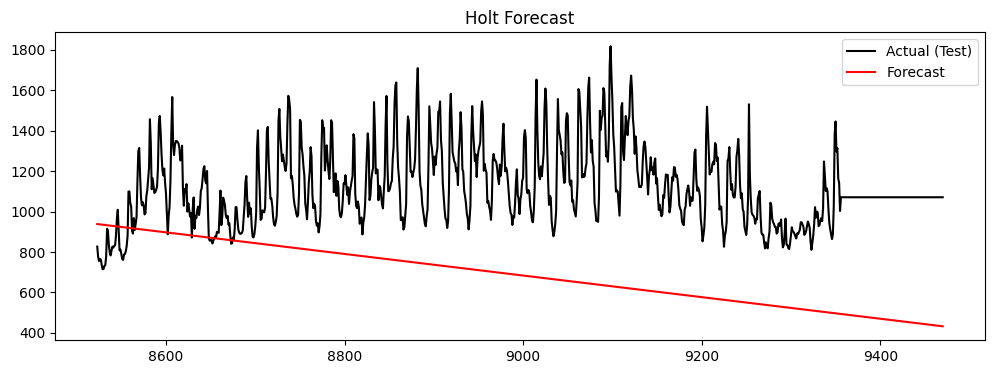

In [12]:
# Holt
holt_model = Holt(y_train).fit(optimized=True)

y_pred_holt = pd.Series(holt_model.forecast(len(y_test)),index=y_test.index)

# sMAPE
denominator = np.abs(y_test) + np.abs(y_pred_holt)
mask = denominator != 0

smape_result = np.mean(
    2 * np.abs(y_pred_holt[mask] - y_test[mask]) / denominator[mask]
)

print(f"sMAPE: {smape_result}")

plt.figure(figsize=(12, 4))
plt.plot(y_test.index, y_test, label='Actual (Test)', color='black')
plt.plot(y_test.index, y_pred_holt, label='Forecast', color='red')
plt.title('Holt Forecast')
plt.legend()
plt.show()


sMAPE: 0.5564309274556138


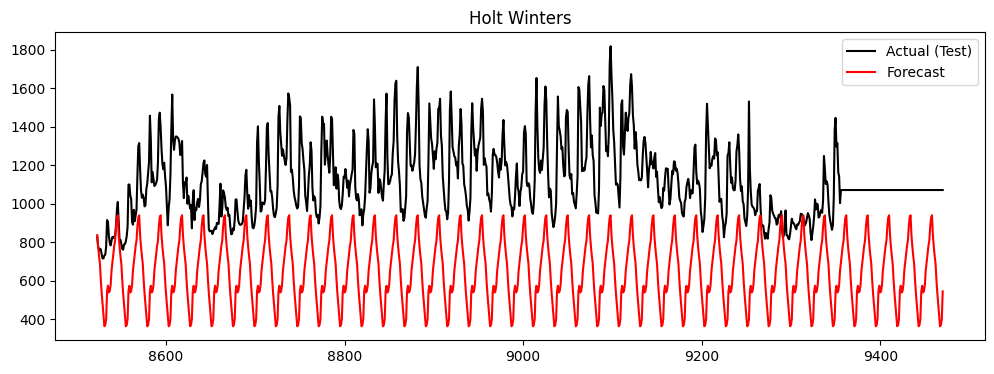

In [13]:
# Holt Winters

hw_model = ExponentialSmoothing(y_train, seasonal='add', seasonal_periods=24).fit()

y_pred_hw = pd.Series(hw_model.forecast(len(y_test)),index=y_test.index)

# sMAPE
denominator = np.abs(y_test) + np.abs(y_pred_hw)
mask = denominator != 0

smape_result = np.mean(
    2 * np.abs(y_pred_hw[mask] - y_test[mask]) / denominator[mask]
)

print(f"sMAPE: {smape_result}")

plt.figure(figsize=(12, 4))
plt.plot(y_test.index, y_test, label='Actual (Test)', color='black')
plt.plot(y_test.index, y_pred_hw, label='Forecast', color='red')
plt.title('Holt Winters')
plt.legend()
plt.show()

### Discuss how the imputation choice influenced:

1. **forecast smoothness**
    : Forward fill imputation replaces missing values with the last observed value (the most recent valid observation), creating flat segments in the time series and substantially reducing short-term variability. On this kind of “flattened” series, SES, which only tracks the overall level, naturally produces very smooth forecasts that visually follow these plateaus, so its prediction line looks stable and well‑aligned with the imputed data. In contrast, Holt and Holt‑Winters try to learn trend and seasonality on top of a series that has already had much of its genuine variation suppressed, so their sMAPE values are worse than SES.

2. **responsiveness to changes**
    : Forward fill delays the introduction of new information during missing intervals, causing models to respond slowly to abrupt changes. Under these conditions, SES, which is inherently slow and conservative in reacting to new information, does not suffer much, because the apparent changes in the imputed series are already small and gradual. Holt and Holt‑Winters, however, are designed to be more responsive to evolving trends and seasonal swings; when those structures are distorted or partially erased by forward fill, the models can misestimate the direction and magnitude of changes, leading to forecasts that react in the “wrong” way or at the wrong time compared to the imputed test data.

3. **perceived model performance**
    : SES achieves the lowest sMAPE (23.9%), while Holt (49.2%) and Holt‑Winters (55.6%) look much worse numerically. However, this performance ranking is heavily influenced by the imputation choice. Forward fill produces a series whose main feature is a relatively stable level with flattened changes, a structure that aligns almost perfectly with SES’s very simple level‑only assumption. Meanwhile, Holt and Holt‑Winters are penalised because they are trying to fit trend and seasonal components to data where those very components have been blurred or distorted by the imputation, so their forecasts deviate more from the forward‑filled test values even if, conceptually, these models are more appropriate for data that truly contain trend and seasonality.



### Explain why better accuracy does not necessarily imply a better model
- While SES achieves the lowest sMAPE, this performance is largely driven by the interaction between forward fill imputation and aggressive smoothing. The model captures average level behavior effectively but fails to represent the high variability present in the raw data. This highlights that improved numerical accuracy does not necessarily correspond to superior modeling of underlying dynamics.